In [6]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree 
from fuzzytree import FuzzyDecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec


Decisions

In [7]:
temp=["hot","hot","hot","mild","cool","cool","cool","mild","cool","mild","mild","mild","hot","mild"]
wind=["weak","strong","weak","weak","weak","strong","strong","weak","weak","weak","strong","strong","weak","str"]
traf=["long","long","long","long","short","short","short","long","short","short","short","long","short","long"]
car_driv=["no","no","yes","yes","yes","no","yes","no","yes","yes","yes","yes","yes","no"]
df=pd.DataFrame([temp,wind,traf,car_driv]).T
df.head()

,0,1,2,3
0,hot,weak,long,no
1,hot,strong,long,no
2,hot,weak,long,yes
3,mild,weak,long,yes
4,cool,weak,short,yes


In [8]:
l= LabelEncoder()
df[0]=l.fit_transform(df[0])
df[1]=l.fit_transform(df[1])
df[2]=l.fit_transform(df[2])
df[3]=l.fit_transform(df[3])
X=df.iloc[:,0:3]
Y=df.iloc[:,3]
clf = DecisionTreeClassifier(max_depth = 2,
 random_state = 0)
clf.fit(X, Y)

DecisionTreeClassifier(max_depth=2, random_state=0)

Calculate the information gain for x1, x2 and x3

Decision tree after choosing the traffic as the root node

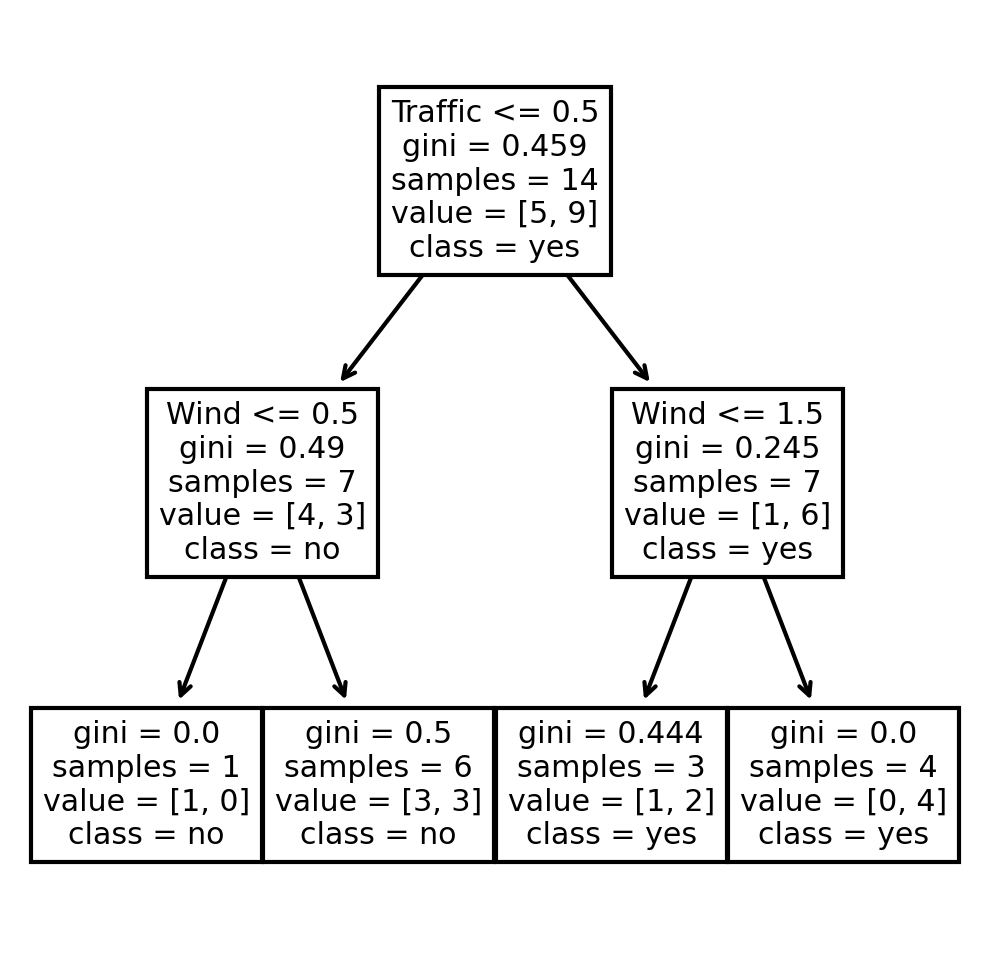

In [11]:
features=['Temperature','Wind','Traffic']
labels=['no','yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(clf,
        feature_names = features,
        class_names=labels)
fig.savefig('imagename.png')
 

def entropy(target_col):
   elements,counts = np.unique(target_col,return_counts = True)
   entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
   return entropy

def InfoGain(data,split_attribute_name,target_name):  
   total_entropy = entropy(data[target_name])
   vals,counts= np.unique(data[split_attribute_name],return_counts=True)
   Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
   Information_Gain = total_entropy - Weighted_Entropy
   return Information_Gain


In [12]:
print("Temperature IF ",InfoGain(df,0,3))
print("WIND IF        ",InfoGain(df,1,3))
print("TRAFFIC JAM IF ",InfoGain(df,2,3))

Temperature IF  0.02922256565895487
WIND IF         0.1299303895316022
TRAFFIC JAM IF  0.15183550136234159


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [24]:
def splitdataset(balance_data):

    X = balance_data.values[:, 1:5]
    Y = balance_data.values[:, 0]

    X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size = 0.3, random_state = 100)
    
    return X, Y, X_train, X_test, y_train, y_test

In [25]:
def train_using_gini(X_train, X_test, y_train):

    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)

    clf_gini.fit(X_train, y_train)
    return clf_gini

In [27]:
def tarin_using_entropy(X_train, X_test, y_train):
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [28]:
def prediction(X_test, clf_object):

    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

In [29]:
def cal_accuracy(y_test, y_pred):

    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))

    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
    
    print("Report : ",
    classification_report(y_test, y_pred))

In [31]:
clf_gini = train_using_gini(X_train, X_test, y_train)
clf_entropy = tarin_using_entropy(X_train, X_test, y_train)

print("Results Using Gini Index:")

y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)

print("Results Using Entropy:")
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)

Results Using Gini Index:
Predicted values:
[1 1 1 1 1]
Confusion Matrix:  [[0 2]
 [0 3]]
Accuracy :  60.0
Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.37         5
weighted avg       0.36      0.60      0.45         5

Results Using Entropy:
Predicted values:
[1 1 1 1 1]
Confusion Matrix:  [[0 2]
 [0 3]]
Accuracy :  60.0
Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.37         5
weighted avg       0.36      0.60      0.45         5



C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Fuzzy Decisions

In [32]:
clf_fuzz = FuzzyDecisionTreeClassifier().fit(X_train, y_train)
clf_sk = DecisionTreeClassifier().fit(X_train, y_train)

In [33]:
ypred_fuzz = clf_fuzz.predict(X_test)

In [34]:
print(f"fuzzytree: {clf_fuzz.score(X_test, y_test)}")
print(f"  sklearn: {clf_sk.score(X_test, y_test)}")

fuzzytree: 0.6
  sklearn: 0.6


In [35]:
print("Results for Fuzzi decison tree classification:")
cal_accuracy(y_test, ypred_fuzz)

Results for Fuzzi decison tree classification:
Confusion Matrix:  [[1 1]
 [1 2]]
Accuracy :  60.0
Report :                precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5

